(deutschs_algorithm)=

# Алгоритм Дойча

Автор(ы):

- [Ширкин Сергей](https://github.com/SergeiShirkin)


**Алгоритм Дойча** (в английском варианте -- **Deutsch's algorithm**) -- это один из первых алгоритмов, показавших, что квантовый компьютер может решать задачи особым способом, отличающимся как от алгоритмов классического компьютера, так и от интуиции и здравого смысла человека. При этом такое решение может занимать меньшее количество шагов.

Нужно прежде всего сказать, что алгоритм Дойча не имеет практического применения в силу своей предельной простоты, зато является простейшим примером, с помощью которого можно понять, в чем состоит отличие квантовых алгоритмов от классических. Данный алгоритм был предложен в 1985 году, когда квантовых компьютеров еще не было, а практически он был реализован в 1998 году на 2-кубитном квантовом компьютере, работавшем на принципах ядерно-магнитного резонанса.

```{admonition} Дэвид Дойч
Помимо занятий теоретической физикой в Оксфордском университете, Дэвид Дойч -- автор книг "Структура реальности" и "Начало бесконечности", в которых он популярно излагает идеи квантовых вычислений с точки зрения многомировой интерпретеции (сторонником которой является) и философствует о будущем науки и человечества. Так что можно сказать, что работа алгоритма, согласно замыслу создателя, производится в параллельных вселенных. Так это или нет, пока проверить невозможно, но вычисления работают, и это главное.
```

Итак, в чем состоит задача, которую решает алгоритм? Представьте, что у вас есть функция, которая представляет собой "черный ящик", принимающий на вход число из множества $\{0, 1\}$. Функция неким образом обрабатывает входное значение и возвращает число из этого же множества, то есть либо $0$, либо $1$. Нам известно, что эта функция принадлежит либо к классу сбалансированных функций, либо к классу константных функций (которые мы также можем называть несбалансированными). Задача алгоритма -- установить, к какому классу принадлежит функция.

Рассмотрим все варианты этих двух классов. Всего их четыре, то есть по две функции в каждом классе. Начнем с несбалансированных:

- $f_1(x) = 0$

Это функция, всегда возвращающая $0$, независимо от входного значения. Для нее справедливы выражения:

$$
f_1(0) = 0
$$
$$
f_1(1) = 0
$$

- $f_2(x) = 1$

Такая функция всегда возвращает $1$, то есть верно следующее:

$$
f_2(0) = 1
$$
$$
f_2(1) = 1
$$

Ну а теперь посмотрим на сбалансированные функции. Для них характерно то, что они могут возвращать как $0$, так и $1$. В этом и заключается "баланс".

- $f_3(x) = x$

Это тождественная функция, которая ничего не делает с входным значением. Для нее справедливо следующее:

$$
f_3(0) = 0
$$
$$
f_3(1) = 1
$$

- $f_4(x) = \overline{x}$

А вот эта функция инвертирует входное значение, то есть возвращает не то число, которое было подано на вход, а другое:

$$
f_4(0) = 1
$$
$$
f_4(1) = 0
$$

Классический компьютер справляется с задачей за два шага. Например, нам дана некоторая функция-"черный ящик", и мы должны установить, сбалансирована ли она. На первом шаге мы отправляем в функцию входное значение $0$. Допустим, мы получили на выходе также $0$. Мы можем сказать, что данная функция -- либо $f_1$ (константная функция, всегда возвращающая $0$), либо $f_3$ (сбалансированная функция, не меняющая входное значение). Для окончательного решения мы должны сделать еще один шаг -- отправить в функцию значение $1$. Если при этом мы получим опять $0$, то это функция $f_1$, а если получили на выходе $1$, то искомая функция -- $f_3$.

Способа, с помощью которого на классическом компьютере можно за одно действие установить, сбалансирована функция или нет, не существует. И здесь свое преимущество показывает квантовый компьютер: он может установить класс функции за одно действие.

Для начала рассмотрим простейшую схему, с помощью которой можно отправлять число на вход и получать ответ от черного ящика:

```{figure} /_static/qcalgo/ru/deutschs_algorithm/scheme_1.png
:name: scheme_1
:width: 400px

Схема 1
```

$U_f$ на данной схеме -- это неизвестная функция (ее также часто называют "оракул"), являющаяся унитарным оператором. Обратите внимание, что в квантовой схеме используются два кубита. Это нужно для того, чтобы информация, с которой работает квантовый компьютер, не стиралась. В квантовом компьютере важно, чтобы все действия с кубитами (кроме операции измерения) были обратимыми, а для этого информация должна сохраняться. В верхнем кубите будет записано входное значение, а в нижнем -- выходное значение функции. Таким образом, входное значение не будет перезаписано значением, которое вернет функция.

Но нам важно будет не только сохранить значение $|x\rangle$, но также и не разрушить $|y\rangle$. Так как кубит $y$ очевидно имеет некоторое изначальное значение, мы не можем его просто перезаписать тем числом, которое выдаст функция $f(x)$. Здесь на помощь приходит операция исключающее ИЛИ - $XOR$ (также ее можно называть сложением по модулю 2), обозначенная на схеме как $\oplus$. В процессе работы черный ящик $U_f$ не только находит значение $f(x)$, но и применяет исключающее ИЛИ к значениям $y$ и $f(x)$.

Операции $XOR$ соответствует такая таблица истинности:

|  a  |  b  | a XOR b |
| :-: | :-: | :-----: |
|  0  |  0  |    0    |
|  0  |  1  |    1    |
|  1  |  0  |    1    |
|  1  |  1  |    0    |

Операция $XOR$ хороша для нас тем, что она не разрушает значение $|y\rangle$, так как является обратимой. Убедиться в этом можно, проверив тождество:

$$
(a \oplus b) \oplus b = a
$$

_Схема 1_ пока что не дает преимущества по сравнению с классическим компьютером, но мы можем ее немного усовершенствовать:

```{figure} /_static/qcalgo/ru/deutschs_algorithm/scheme_2.png
:name: scheme_2
:width: 500px

Схема 2
```

В новой схеме оба кубита вначале будут находиться в состоянии $|0\rangle$. Затем мы применим к верхнему кубиту оператор Адамара, а к нижнему -- гейт $X$, а затем так же, как и к верхнему, оператор Адамара. Тем самым мы приведем оба кубита в состояние суперпозиции перед тем, как они попадут на вход функции $U_f$.
Верхний кубит будет находиться в такой суперпозиции:

$$
|x\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle,
$$

а нижний - в такой:

$$
|y\rangle = \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle.
$$

Если рассмотреть это как систему $|\psi\rangle$, состоящую из двух кубитов, то она будет выглядеть так:

$$
|\psi\rangle = \frac{1}{2}(|0\rangle + |1\rangle)(|0\rangle - |1\rangle)
$$

Сразу после $U_f$ система будет находиться в состоянии:

$$|\psi\rangle = \frac{1}{2}(|0\rangle + |1\rangle)(|0 \oplus f(x)\rangle - |1 \oplus f(x)\rangle)
$$

После того, как $U_f$ отрабатывает, нижний кубит, как это ни странно, уже нас не интересует, так что к нему операции больше не применяются, и его измерение также не производится.

Дело в том, что ответ на вопрос о том, сбалансирована функция $f(x)$ или нет, будет нами получен из верхнего кубита после того, как на него подействует оператор Адамара и будет произведено измерение. В том случае, если функция сбалансирована, результат измерения верхнего кубита будет равен $1$, а если несбалансированна -- $0$.

Разберемся подробнее, почему это происходит. Рассмотрим все возможные $f(x)$, которые могут находиться в черном ящике:

- $f(x) = f_1$

В этом случае $f(x)$ всегда принимает значение $0$, и система кубитов будет выглядеть так:

$$
|\psi\rangle = \frac{1}{2}(|0\rangle + |1\rangle)(|0\rangle - |1\rangle) = \frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle)
$$

- $f(x) = f_2$

$f(x)$ будет равно $1$ независимо от аргумента. Используя таблицу истинности XOR, легко убедиться, что во второй скобке $|0\rangle$ и $|1\rangle$ поменяются местами, но если вынести минус за скобку, то мы можем его не учитывать, так общий фазовый множитель (-1 в данном случае) для системы не имеет значения:

$$
|\psi\rangle = \frac{1}{2}(|0\rangle + |1\rangle)(|1\rangle - |0\rangle) = -\frac{1}{2}(|0\rangle + |1\rangle)(|0\rangle - |1\rangle) = -\frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle)
$$

Видно, что при применении функций $f_1$ и $f_2$, являющихся несбалансированными, мы получаем фактически одно и тоже состояние. Если после этого применить к первому кубиту оператор Адамара, то после измерения мы получим значение $0$.

Рассмотрим теперь сбалансированные функции $f_3$ и $f_4$.

- $f(x) = f_3$

Здесь ситуация сложнее, так как $f(x)$ будет зависеть от состояния первого кубита. Поэтому мы раскроем скобки, а значения функции подставим позже:

$
|\psi\rangle = \frac{1}{2}(|0\rangle + |1\rangle)(|0 \oplus f(x)\rangle - |1 \oplus f(x)\rangle) =
\frac{1}{2}(|0\rangle |0 \oplus f(x)\rangle - |0\rangle |1 \oplus f(x)\rangle + |1\rangle |0 \oplus f(x)\rangle - |1\rangle |1 \oplus f(x)\rangle)=$

$
=\frac{1}{2}(|0\rangle |0 \oplus 0\rangle - |0\rangle |1 \oplus 0\rangle + |1\rangle |0 \oplus 1\rangle - |1\rangle |1 \oplus 1\rangle) =
\frac{1}{2}(|00\rangle - |01\rangle + |11\rangle - |10\rangle) =$

$
=\frac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle) = \frac{1}{2}(|0\rangle - |1\rangle)(|0\rangle - |1\rangle)$

Видно, что первый кубит поменял свое состояние - теперь он в суперпозиции $\frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$, так что далее к нему можно применить оператор Адамара, после которого он перейдет в состояние $|1\rangle$.

- $f(x) = f_4$

Здесь будет похожая ситуация:

$
|\psi\rangle = \frac{1}{2}(|0\rangle + |1\rangle)(|0 \oplus f(x)\rangle - |1 \oplus f(x)\rangle) =
\frac{1}{2}(|0\rangle |0 \oplus f(x)\rangle - |0\rangle |1 \oplus f(x)\rangle + |1\rangle |0 \oplus f(x)\rangle - |1\rangle |1 \oplus f(x)\rangle)=$

$
=\frac{1}{2}(|0\rangle |0 \oplus 1\rangle - |0\rangle |1 \oplus 1\rangle + |1\rangle |0 \oplus 0\rangle - |1\rangle |1 \oplus 0\rangle) =
\frac{1}{2}(|01\rangle - |00\rangle + |10\rangle - |11\rangle) =$

$
=-\frac{1}{2}(|00\rangle - |01\rangle + |11\rangle - |10\rangle) =-\frac{1}{2}(|0\rangle - |1\rangle)(|0\rangle - |1\rangle)$

Получили то же состояние $|\psi\rangle$, что и для $f_3$, с точностью до фазового множителя. Соответственно, здесь первый кубит после применения оператора Адамара также будет измерен с результатом $1$.

Теперь можно получить более компактную формулу, которая подходит для всех четырех функций:

$$
|\psi\rangle = \frac{1}{2}((-1)^{f(0)}|0\rangle + (-1)^{f(1)}|1\rangle)(|0\rangle - |1\rangle)
$$

```{admonition} Задание
С помощью квантовых операторов попробуйте создать $U_f$ для всех четырех $f(x)$.

Задание рекомендуется сделать до прочтения программистской части по алгоритму Дойча, так как там содержится ответ.
```

## Алгоритм Дойча в коде

Запрограммируем алгоритм с помощью библиотеки PennyLane. Предполагается, что функция, находящаяся в черном ящике, изначально присутствует, но для учебного примера создадим также и ее, точнее, все ее четыре варианта. Для того, чтобы нам не сразу было известно, какая из этих функций анализируется алгоритмом (иначе будет неинтересно), будем использовать случайный выбор функции.

Импортируем все необходимые библиотеки и модули, а также создадим квантовое устройство-симулятор, рассчитанное на схему из двух кубитов:

In [1]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", shots=1, wires=2)

Теперь создадим функции для черного ящика. Обратите внимание, что здесь уже учтено сложение по модулю $2$ результата функции с состоянием второго кубита:

In [2]:
def f1():
    pass

def f2():
    qml.PauliX(wires=[1])

def f3():
    qml.CNOT(wires=[0, 1])

def f4():
    qml.PauliX(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.PauliX(wires=0)

Создадим словарь с функциями и их названиями:

In [3]:
black_boxes_dict = {"f1": f1, "f2": f2, "f3": f3, "f4": f4}

А вот таким образом мы будем случайно выбирать название функции для черного ящика:

In [4]:
def random_black_box(black_boxes_dict):
    black_boxes_dict_list_keys = list(black_boxes_dict.keys())
    n = np.random.randint(0, len(black_boxes_dict_list_keys))

    return black_boxes_dict_list_keys[n]

А теперь самое важное -- сам алгоритм Дойча:

In [5]:
@qml.qnode(dev, interface=None)
def circuit(black_box_name):
    qml.Hadamard(wires=0)
    qml.PauliX(wires=1)
    qml.Hadamard(wires=1)

    black_boxes_dict[black_box_name]()
    qml.Hadamard(wires=0)

    return qml.sample(qml.PauliZ([0]))

Итак, подготовительные действия завершены, можно приступать к демонстрации работы алгоритма.

Выберем случайным образом функцию:

In [6]:
black_box_name = random_black_box(black_boxes_dict)

А затем запустим алгоритм Дойча и выведем результат его работы. Собственное значение $1$ оператора $Z$ будет соответствовать состоянию $|0\rangle$ (функция несбалансированная), а собственное значение $-1$ -- состоянию $|1\rangle$ (функция сбалансирована):

In [7]:
result = circuit(black_box_name)
print(result)

1


Проверим, насколько правильно сработал алгоритм. Для этого посмотрим на функцию из черного ящика:

In [8]:
print(black_box_name)

f1


Также посмотрим, как выглядит квантовая схема:

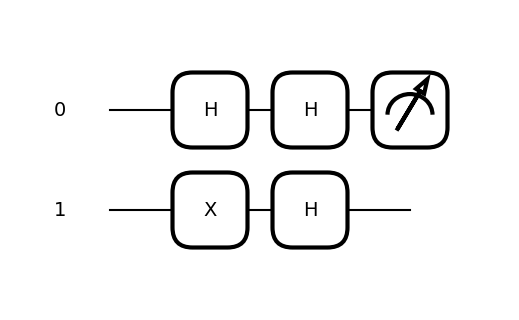

In [9]:
qml.drawer.use_style("default")
fig, ax = qml.draw_mpl(circuit)(black_box_name)
fig.show()

На примере алгоритма Дойча мы видим, что уже двухкубитная схема дает прирост скорости в два раза. Если же увеличивать количество входных параметров (как в аналогичном алгоритме [Дойча-Йожи](https://ru.wikipedia.org/wiki/Алгоритм_Дойча_—_Йожи)), то ускорение будет экспоненциальным.

Для специалистов, занимающихся искусственным интеллектом, алгоритм может быть интересен тем, что не просто решает задачу нахождения некоторого значения, действуя как калькулятор, а дает возможность определить скрытую функцию. Это похоже на задачи машинного обучения, когда дата сайентист, производя математические манипуляции с данными, в итоге получает модель (фактически -- функцию), описывающую связь признаков с целевой переменной. Таким образом, интерес специалистов ИИ к квантовым вычислениям, вполне понятен, как и перспективы квантовых вычислений в этой области.